<a href="https://colab.research.google.com/github/yuvashrigopal/yuva.mental/blob/main/Copy_of_Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# Load the dataset
data = pd.read_csv('/content/archive (16).zip')

# Display the first few rows of the dataset
print(data.head())


    age  employ  address  income  debtinc   creddebt   othdebt   ed  default
0  41.0      17       12   176.0      9.3  11.359392  5.008608  3.0        1
1  27.0      10        6    31.0     17.3   1.362202  4.000798  1.0        0
2  40.0      15        7     NaN      5.5   0.856075  2.168925  1.0        0
3  41.0      15       14   120.0      2.9   2.658720  0.821280  NaN        0
4  24.0       2        0    28.0     17.3   1.787436  3.056564  2.0        1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       680 non-null    float64
 1   employ    700 non-null    int64  
 2   address   700 non-null    int64  
 3   income    663 non-null    float64
 4   debtinc   700 non-null    float64
 5   creddebt  700 non-null    float64
 6   othdebt   700 non-null    float64
 7   ed        680 non-null    float64
 8   default   700 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 49.3 KB
None
              age      employ     address     income     debtinc    creddebt  \
count  680.000000  700.000000  700.000000  663.00000  700.000000  700.000000   
mean    34.750000    8.388571    8.268571   45.74359   10.260571    1.553553   
std      7.973215    6.658039    6.821609   37.44108    6.827234    2.117197   
min     20.000000    0.000000    0.000000   14.00000    0.400000    0.011696   
25%     28.

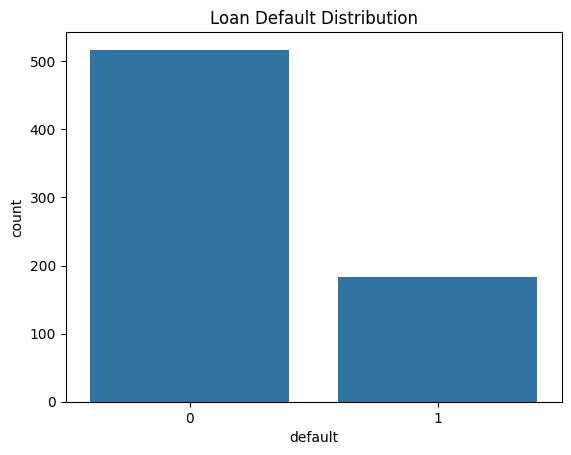

In [ ]:
# Check for missing values and data types
print(data.info())
print(data.describe())

# Visualize the distribution of the target variable
sns.countplot(x='default', data=data)  # Assuming 'default' is the target column
plt.title('Loan Default Distribution')
plt.show()


In [ ]:
# Fill missing values
# For numerical columns, fill with mean
for col in data.select_dtypes(include=[np.number]).columns:
    data[col].fillna(data[col].mean(), inplace=True)

# For categorical columns, fill with mode
for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Encode categorical variables
label_encoders = {}
categorical_cols = ['age', 'address', 'default']  # Example categorical columns

for col in categorical_cols:
    if col in data.columns:  # Ensure the column exists in the dataset
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le
    else:
        print(f"Warning: {col} not found in the dataset.")

# Define features and target
X = data.drop('default', axis=1)  # Features
y = data['default']  # Target variable

# Check for any remaining missing values
if X.isnull().sum().any() or y.isnull().sum() > 0:
    print("Warning: There are still missing values in the dataset.")
else:
    print("No missing values found in features and target.")


No missing values found in features and target.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)


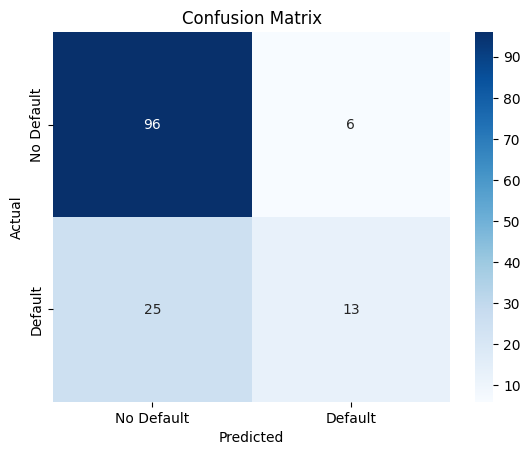

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       102
           1       0.68      0.34      0.46        38

    accuracy                           0.78       140
   macro avg       0.74      0.64      0.66       140
weighted avg       0.76      0.78      0.75       140



In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))
